In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
import shap
import os
from datetime import datetime
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.metrics import precision_recall_fscore_support
from xgboost import XGBClassifier
import xgboost as xgb
import joblib
from sklearn.metrics import fbeta_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score
import numpy as np

In [30]:
base_dir = 'E:/backup_CML_1/New_Drugs/Li_Endo/Result_Revision_1/12f_knn_metric_euclidean_n_neighbors_3/'
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

In [31]:
data_A  = pd.read_csv('E:/backup_CML_1/New_Drugs/Li_Endo/Li_Endo_Training.csv')
data_A1 = data_A.drop(columns=["Sample_ID", "Drug_Name", "risk_level", 'Vm_Peak_O', 'Ca_Peak_O'])
print(data_A1)

       dVm/dt_repol_O  Max_dVm/dt_O  Vm_Resting_O     APD90_O     APD50_O  \
0           -0.300345    250.237212    -88.002062  391.600435  318.450435   
1           -0.317049    252.406287    -88.003051  370.700439  303.150439   
2           -0.279408    252.691407    -87.999663  420.275299  340.875299   
3           -0.255510    251.527446    -88.001840  455.900506  365.575506   
4           -0.298442    252.932589    -88.001574  394.375319  321.325319   
...               ...           ...           ...         ...         ...   
21995       -0.298215    250.843263    -88.039405  350.900470  281.325470   
21996       -0.283611    250.457216    -88.036115  371.725455  297.850455   
21997       -0.290358    250.842534    -88.034500  366.000421  293.750421   
21998       -0.281967    250.401090    -88.034736  374.300405  300.075404   
21999       -0.280863    250.389663    -88.034116  376.475531  301.800531   

       APDtri_O  Ca_Diastole_O     CaD90_O  CaD50_O  Catri_O    qNet_O  \
0

In [32]:
X_data_bfr = data_A1.drop(['risk_code'], axis=1)
y_data_label = data_A1['risk_code']
print(X_data_bfr)
print(y_data_label)

       dVm/dt_repol_O  Max_dVm/dt_O  Vm_Resting_O     APD90_O     APD50_O  \
0           -0.300345    250.237212    -88.002062  391.600435  318.450435   
1           -0.317049    252.406287    -88.003051  370.700439  303.150439   
2           -0.279408    252.691407    -87.999663  420.275299  340.875299   
3           -0.255510    251.527446    -88.001840  455.900506  365.575506   
4           -0.298442    252.932589    -88.001574  394.375319  321.325319   
...               ...           ...           ...         ...         ...   
21995       -0.298215    250.843263    -88.039405  350.900470  281.325470   
21996       -0.283611    250.457216    -88.036115  371.725455  297.850455   
21997       -0.290358    250.842534    -88.034500  366.000421  293.750421   
21998       -0.281967    250.401090    -88.034736  374.300405  300.075404   
21999       -0.280863    250.389663    -88.034116  376.475531  301.800531   

       APDtri_O  Ca_Diastole_O     CaD90_O  CaD50_O  Catri_O    qNet_O  \
0

In [33]:
label_encoder = LabelEncoder()
y_data = label_encoder.fit_transform(y_data_label)

In [34]:
# X_data = standard_scaler_np(X_data_bfr)
X_data = X_data_bfr
print(X_data)

       dVm/dt_repol_O  Max_dVm/dt_O  Vm_Resting_O     APD90_O     APD50_O  \
0           -0.300345    250.237212    -88.002062  391.600435  318.450435   
1           -0.317049    252.406287    -88.003051  370.700439  303.150439   
2           -0.279408    252.691407    -87.999663  420.275299  340.875299   
3           -0.255510    251.527446    -88.001840  455.900506  365.575506   
4           -0.298442    252.932589    -88.001574  394.375319  321.325319   
...               ...           ...           ...         ...         ...   
21995       -0.298215    250.843263    -88.039405  350.900470  281.325470   
21996       -0.283611    250.457216    -88.036115  371.725455  297.850455   
21997       -0.290358    250.842534    -88.034500  366.000421  293.750421   
21998       -0.281967    250.401090    -88.034736  374.300405  300.075404   
21999       -0.280863    250.389663    -88.034116  376.475531  301.800531   

       APDtri_O  Ca_Diastole_O     CaD90_O  CaD50_O  Catri_O    qNet_O  \
0

In [ ]:
# Define the number of features (if needed for preprocessing)
num_features = 3

# Define the hyperparameters to search for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'metric': ['euclidean', 'manhattan']
}

# Initialize the KNN classifier and GridSearchCV
knn = KNeighborsClassifier()
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(estimator=knn, param_grid=param_grid, cv=skf, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_result = grid.fit(X_data, y_data)

# Get the best hyperparameters
best_n_neighbors = grid_result.best_params_['n_neighbors']
best_metric = grid_result.best_params_['metric']
print(grid_result.best_params_)

# Optionally, re-train or evaluate the model using the best parameters
knn_best = KNeighborsClassifier(n_neighbors=best_n_neighbors, metric=best_metric)

# Initialize StratifiedKFold for cross-validation (if needed)
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

fold = 0
accuracies = []  # Store each fold's accuracy

for train_index, test_index in skf.split(X_data, y_data):
    fold += 1
    X_train, X_test = X_data.iloc[train_index], X_data.iloc[test_index]
    y_train, y_test = y_data[train_index], y_data[test_index]

    # Fit the KNN model
    knn_best.fit(X_train, y_train)
    
    # Save the model for the current fold
    model_filename = os.path.join(base_dir, f'11f_knn_model_metric_{best_metric}_n_neighbors_{best_n_neighbors}_fold_{fold}.joblib')
    joblib.dump(knn_best, model_filename)
    print(f'Model for fold {fold} saved to {model_filename}')

    # Make predictions and evaluate
    y_pred = knn_best.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"Fold {fold}: Accuracy = {accuracy}")

# Calculate and print the average accuracy across all folds
print(f"Average Cross-Validation Accuracy: {np.mean(accuracies)}")

In [35]:
data_testA  = pd.read_csv("E:/backup_CML_1/New_Drugs/Li_Endo/Li_Endo_Testing.csv")  # Ganti dengan lokasi dataset A
data_testA1 = data_testA.drop(columns=["Sample_ID", "Drug_Name", "risk_level", 'Vm_Peak_O', 'Ca_Peak_O', 'qInward_O', 'Vm_Resting_O', 'Ca_Diastole_O', 'dVm/dt_repol_O', 'qNet_O', 'Max_dVm/dt_O', 'APDtri_O', 'Catri_O', 'CaD50_O'])
print(data_testA1)

          APD90_O     APD50_O     CaD90_O  risk_code
0      348.200591  287.100592  656.000001          1
1      348.200478  287.100478  656.000001          1
2      348.200607  287.100607  656.000001          1
3      348.200343  287.100344  656.000001          1
4      348.200364  287.100364  656.000001          1
...           ...         ...         ...        ...
31980  574.150367  443.650367  796.500001          0
31981  555.200410  431.600410  780.000001          0
31982  526.400475  412.700475  769.500001          0
31983  586.175406  451.700406  795.000001          0
31984  570.425342  441.500342  786.500001          0

[31985 rows x 4 columns]


In [36]:
X_data_test_bfr = data_testA1.drop(['risk_code'], axis=1)
y_data_test_lbl = data_testA1['risk_code']

In [37]:
label_encoder = LabelEncoder()
y_data_test = label_encoder.fit_transform(y_data_test_lbl)

In [38]:
# X_data_test = standard_scaler_np(X_data_test_bfr)
X_data_test = X_data_test_bfr
X_data_test

,APD90_O,APD50_O,CaD90_O
0,348.200591,287.100592,656.000001
1,348.200478,287.100478,656.000001
2,348.200607,287.100607,656.000001
3,348.200343,287.100344,656.000001
4,348.200364,287.100364,656.000001
...,...,...,...
31980,574.150367,443.650367,796.500001
31981,555.200410,431.600410,780.000001
31982,526.400475,412.700475,769.500001
31983,586.175406,451.700406,795.000001


In [39]:
# from sklearn.externals import joblib  # If using a version of sklearn that still includes externals
# If the above import doesn't work, you can usually just use:
# from joblib import load
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd
import numpy as np
import os

# Assuming X_scaled_test and y_encoded_test are your test features and labels
# Note: For ROC AUC score, you need the true binary or multiclass labels, not one-hot encoded

results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'AUC'])

folder_name = base_dir

for file in os.listdir(folder_name):
    if file.endswith(".joblib"):
        model_path = os.path.join(folder_name, file)
        model = joblib.load(model_path)

        # Evaluate the model
        predictions = model.predict(X_data_test)
        accuracy = accuracy_score(y_data_test, predictions)
        
        # If your task is binary classification, calculate AUC
        # ROC AUC requires the prediction scores, which could be probabilities of the positive class
        # Ensure your y_encoded_test is not one-hot encoded for this calculation
        if len(np.unique(y_data_test)) == 2:
            y_pred_proba = model.predict_proba(X_data_test)[:, 1]  # Probabilities of the positive class
            auc = roc_auc_score(y_data_test, y_pred_proba)
        else:
            auc = "N/A"  # Or handle multiclass AUC calculation
        
        # Append results to the DataFrame
        results_df = results_df.append({'Model': file, 'Accuracy': accuracy, 'AUC': auc}, ignore_index=True)

# Assuming save_dir is defined and is the directory where you want to save the evaluation results
results_path = os.path.join(base_dir, 'evaluation_results.xlsx')
results_df.to_excel(results_path, index=False)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- APDtri_O
- CaD50_O
- Ca_Diastole_O
- Catri_O
- Max_dVm/dt_O
- ...


In [40]:
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, fbeta_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load the KNN model from the specified path
model_path = base_dir + "12f_knn_model_fold_5.joblib"  # Update this path to your KNN model
model_test = joblib.load(model_path)

In [41]:
# Create an empty DataFrame for the sampled data
sampled_data = pd.DataFrame()

# Iterate over each class in the 'risk_code' column and sample instances
for risk_code in data_A1['risk_code'].unique():
    class_sample_size = min(len(data_A1[data_A1['risk_code'] == risk_code]), 300)  # Take 100 or the class size, whichever is smaller
    sampled_data = pd.concat([sampled_data, data_A1[data_A1['risk_code'] == risk_code].sample(n=class_sample_size, random_state=42)])

# Drop the 'risk_code' column to prepare the data for SHAP
X_sampled_data = sampled_data.drop(columns=['risk_code'])

# Initialize the explainer with a background dataset that matches the size of X_sampled_data
# This automatically adjusts to the actual number of samples in X_sampled_data
background = shap.sample(X_sampled_data)  # Use all of X_sampled_data as background
explainer = shap.KernelExplainer(model_test.predict, background)

# Calculate SHAP values for a sample from the sampled data without 'risk_code'
shap_values = explainer.shap_values(X_sampled_data)

  0%|          | 0/900 [00:00<?, ?it/s]

In [42]:
shap_values

array([[ 2.59983572e-04, -1.08350167e-01, -5.87843789e-03, ...,
        -1.31342849e-02, -6.45251991e-05, -1.68867291e-03],
       [ 3.21072051e-03, -3.84814313e-03, -3.11158913e-03, ...,
        -1.23777461e-01, -8.29608086e-03,  6.29364268e-03],
       [-9.92632442e-04,  9.45573568e-03, -3.67346853e-03, ...,
         4.63530500e-02, -1.20653250e-03, -1.04486776e-02],
       ...,
       [ 8.15981470e-03, -2.46155084e-02, -3.36707102e-03, ...,
        -3.71359952e-02, -7.68545459e-04, -1.13909223e-03],
       [-6.11943585e-03, -1.84076142e-02, -1.46162895e-02, ...,
        -4.99853092e-02,  4.49445335e-03, -4.64700236e-04],
       [ 1.51054846e-03, -1.80654686e-02, -2.41311978e-03, ...,
        -3.50027230e-02, -2.38086490e-03,  3.69335650e-03]])

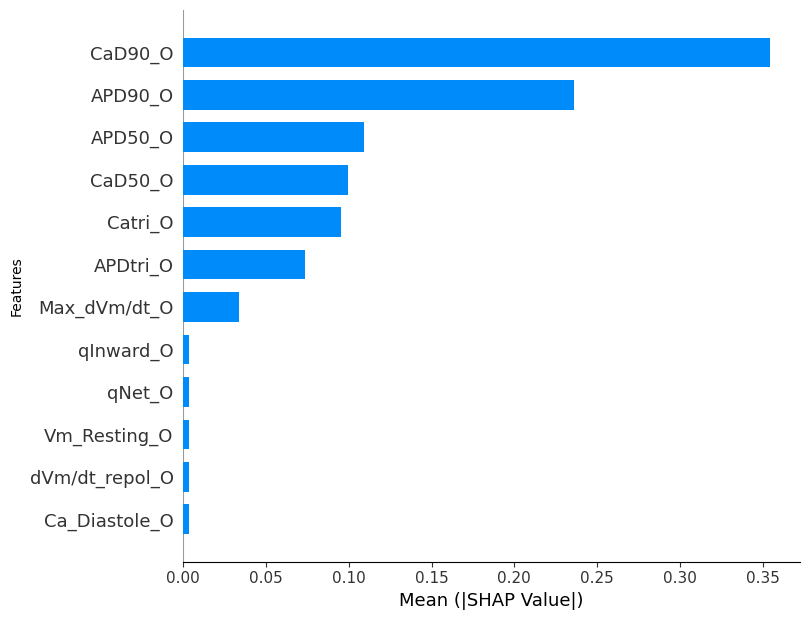

In [43]:
shap.summary_plot(shap_values, X_data, plot_type="bar",
#                   class_names=['High-risk', 'Intermediate-risk', 'Low-risk'],
                  feature_names=X_data.columns, show=False)
plt.ylabel("Features")
plt.xlabel("Mean (|SHAP Value|)")
plt.show()

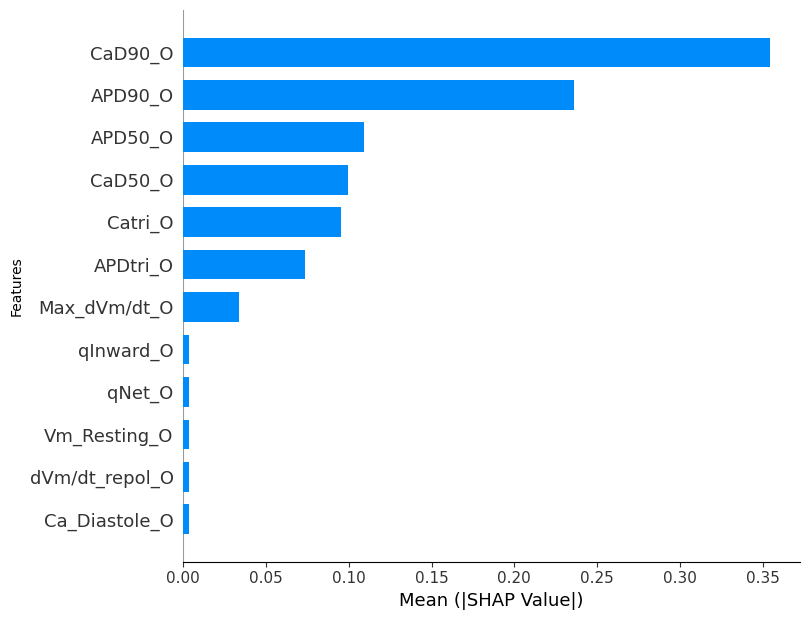

In [44]:
# Use the correct dataset for the summary plot, which should match the data passed to the explainer
shap.summary_plot(shap_values, X_sampled_data, plot_type="bar", 
                  class_names=['High-risk', 'Intermediate-risk', 'Low-risk'],
                  feature_names=X_sampled_data.columns, show=False)
plt.ylabel("Features")
plt.xlabel("Mean (|SHAP Value|)")
# plt.savefig("E:/backup_CML_1/New_Drugs/Li_Endo/Result_Revision_1/12f_knn_metric_euclidean_n_neighbors_3/KNN_Sum_Feature_Importance.jpg")
plt.show()

  0%|          | 0/900 [00:00<?, ?it/s]

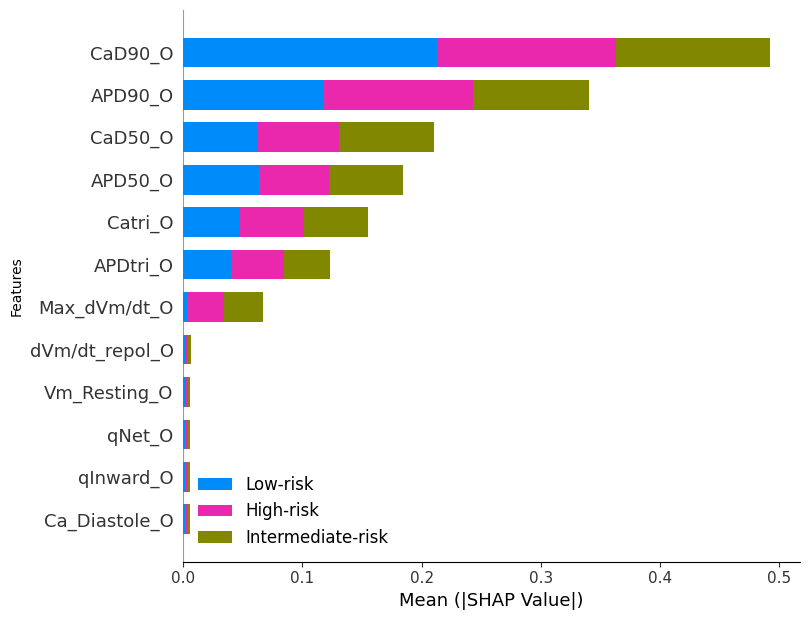

In [45]:
# Create the SHAP explainer using the predict_proba function of the KNN model
explainer = shap.KernelExplainer(model_test.predict_proba, background)

# Calculate SHAP values for the provided sample data
shap_values = explainer.shap_values(X_sampled_data)

# Use the correct dataset for the summary plot, which should match the data passed to the explainer
shap.summary_plot(shap_values, X_sampled_data, plot_type="bar", 
                  class_names=['High-risk', 'Intermediate-risk', 'Low-risk'],
                  feature_names=X_sampled_data.columns, show=False)
plt.ylabel("Features")
plt.xlabel("Mean (|SHAP Value|)")
plt.show()

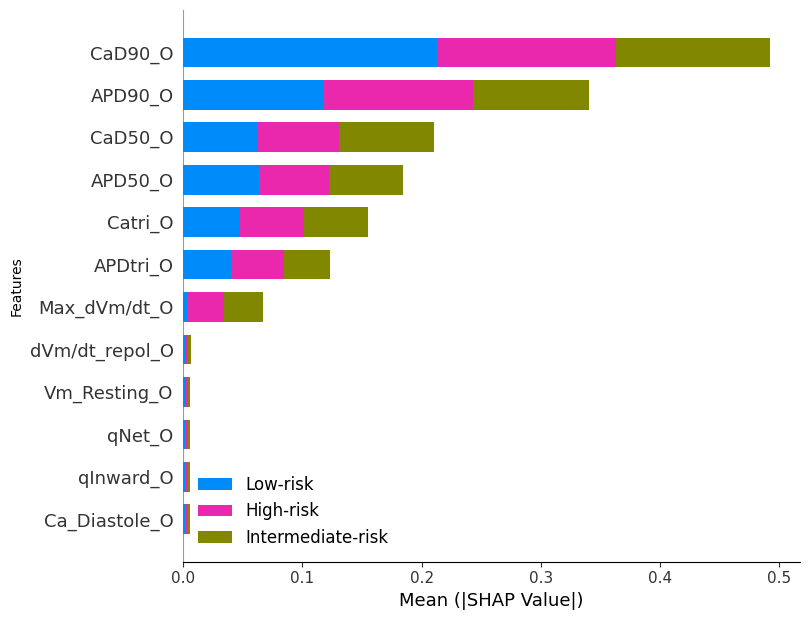

In [46]:
# Use the correct dataset for the summary plot, which should match the data passed to the explainer
shap.summary_plot(shap_values, X_sampled_data, plot_type="bar", 
                  class_names=['High-risk', 'Intermediate-risk', 'Low-risk'],
                  feature_names=X_sampled_data.columns, show=False)
plt.ylabel("Features")
plt.xlabel("Mean (|SHAP Value|)")
plt.show()

In [47]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Assuming 'shap_values' is a list of arrays, where each array corresponds to a class
# and 'X_data_test_bfr.columns' gives you the feature names.

# Colors and class names for each class
class_colors = ['#EC2CAC', '#077CDB', '#7E8511']
class_names = ['High-risk', 'Intermediate-risk', 'Low-risk']

# Output directory for saving TIFF files
output_directory = 'E:/backup_CML_1/New_Drugs/Li_Endo/Result_Revision_1/12f_knn_metric_euclidean_n_neighbors_3/'  # Change to your specific directory

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Prepare data for the stacked bar plot
feature_names = X_data_test_bfr.columns
num_features = len(feature_names)
num_classes = len(shap_values)
mean_abs_shap_values = np.abs(shap_values).mean(axis=1)  # Mean across samples for each class

# Accumulate total SHAP values for each feature
total_shap_values = np.sum(mean_abs_shap_values, axis=0)

# Create the bar plot
plt.figure(figsize=(10, 6))
bars_data = np.zeros(num_features)  # Initialize the bottom of the bars

for class_index in range(num_classes):
    # Mean across samples for this class
    mean_vals = mean_abs_shap_values[class_index]
    plt.barh(feature_names, mean_vals, left=bars_data, color=class_colors[class_index],
             edgecolor='black', height=0.5, label=class_names[class_index])
    bars_data += mean_vals  # Update the bottom for the next stack

# Add text with the total SHAP value outside of each stacked bar
for i, (feature_name, total_val) in enumerate(zip(feature_names, total_shap_values)):
    plt.text(bars_data[i], i, f'{total_val:.2f}', ha='left', va='center', color='black', fontsize=8)

# Customize the plot
plt.xlabel('Mean (|SHAP Value|)')
plt.ylabel('Features')
plt.title('Summary of SHAP Values by Class')
plt.grid(axis='x')
plt.legend(loc='lower right')

# Save the plot as a TIFF file with DPI 300
output_file_path = os.path.join(output_directory, 'SHAP_Summary_Stacked_Plot1.tif')
plt.savefig(output_file_path, format='tiff', dpi=300)
plt.close()

print(f"Plot saved successfully at: {output_file_path}")


ValueError: shape mismatch: objects cannot be broadcast to a single shape

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Assuming 'shap_values' is a list of arrays, where each array corresponds to a class
# and 'X_data_test_bfr.columns' gives you the feature names.

# Colors and class names for each class
class_colors = ['#EC2CAC', '#077CDB', '#7E8511']
class_names = ['High-risk', 'Intermediate-risk', 'Low-risk']

# Output directory for saving TIFF files
output_directory = 'E:/backup_CML_1/New_Drugs/Li_Endo/Result_Revision_1/12f_knn_metric_euclidean_n_neighbors_3/'  # Change to your specific directory

# Create the output directory if it doesn't exist
os.makedirs(output_directory, exist_ok=True)

# Prepare data for the stacked bar plot
feature_names = X_data.columns
num_features = len(feature_names)
num_classes = len(shap_values)
mean_abs_shap_values = np.abs(shap_values).mean(axis=1)  # Mean across samples for each class

# Accumulate total SHAP values for each feature
total_shap_values = np.sum(mean_abs_shap_values, axis=0)

# Sort features by total SHAP values from highest to lowest
sorted_indices = np.argsort(total_shap_values)  # The minus sign is for descending order
sorted_feature_names = feature_names[sorted_indices]
sorted_total_shap_values = total_shap_values[sorted_indices]

# Create the sorted stacked bar plot
plt.figure(figsize=(10, 6))
bars_data = np.zeros(num_features)  # Initialize the bottom of the bars

for class_index in range(num_classes):
    # Sort the mean values according to the sorted feature indices
    sorted_mean_vals = mean_abs_shap_values[class_index][sorted_indices]
    
    # Plot sorted stacked bars
    plt.barh(sorted_feature_names, sorted_mean_vals, left=bars_data, color=class_colors[class_index],
             edgecolor='black', height=0.5, label=class_names[class_index])
    bars_data += sorted_mean_vals  # Update the bottom for the next stack

# Add text with the total SHAP value outside of each stacked bar
for i, total_val in enumerate(sorted_total_shap_values):
    plt.text(bars_data[i], i, f'{total_val:.2f}', ha='left', va='center', color='black', fontsize=8)

# Customize the plot
plt.xlabel('Mean (|SHAP Value|)')
plt.ylabel('Features')
plt.title('Summary of SHAP Values by Class')
plt.grid(axis='x')
plt.legend(loc='lower right')

# Save the plot as a TIFF file with DPI 300
output_file_path = os.path.join(output_directory, 'SHAP_Summary_Stacked_Plot2.tif')
plt.savefig(output_file_path, format='tiff', dpi=300)
plt.close()

print(f"Plot saved successfully at: {output_file_path}")

Plot saved successfully at: E:/backup_CML_1/New_Drugs/Li_Endo/Result_Revision_1/12f_knn_metric_euclidean_n_neighbors_3/SHAP_Summary_Stacked_Plot2.tif


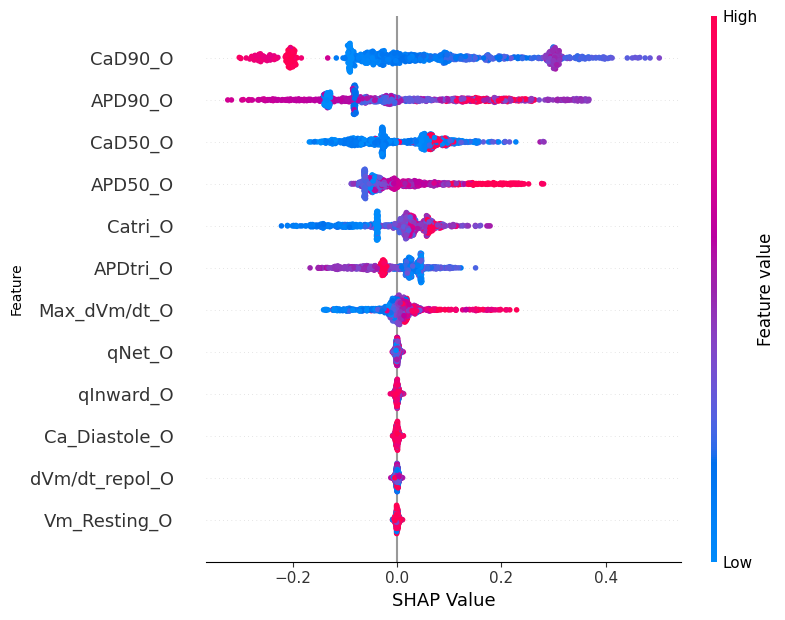

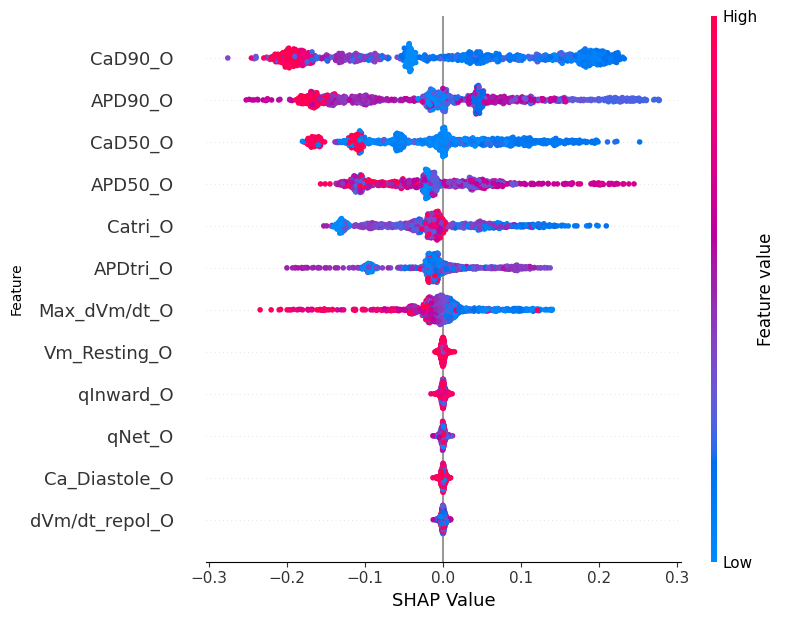

KeyboardInterrupt: 

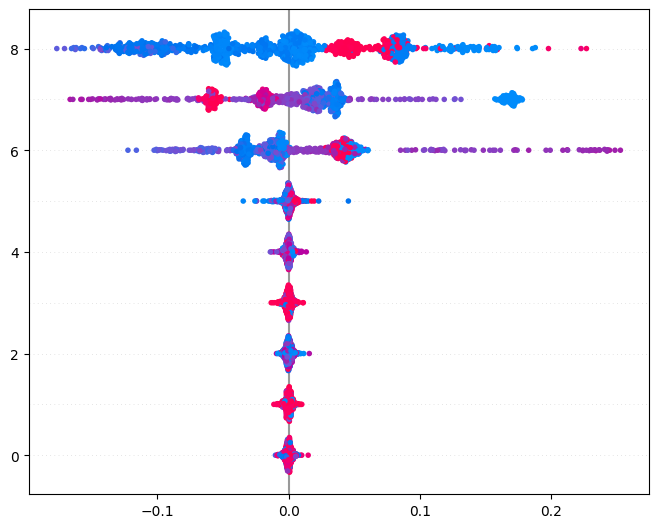

In [23]:
for i in range(len(shap_values)):
    shap.summary_plot(shap_values[i], X_sampled_data.values, feature_names = X_sampled_data.columns, show=False)
    # plt.title("Distribution of SHAP values for each feature in the 'Intermediate-Risk' class")
    plt.ylabel("Feature")
    plt.xlabel("SHAP Value")
    plt.savefig("E:/backup_CML_1/New_Drugs/Li_Endo/Result_Revision_1/12f_knn_metric_euclidean_n_neighbors_3/SHAP_Value_HIL_Risk_{0}.jpg".format(i))
    # plt.savefig("my_dependence_plot.pdf") # we can save a PDF of the figure if we want
    plt.show()

In [ ]:
for i in range(len(shap_values)):
    shap.summary_plot(shap_values[i], X_sampled_data.values, feature_names = X_sampled_data.columns, show=False)
    plt.ylabel("Feature")
    plt.xlabel("SHAP Value")
    # Mengubah format penyimpanan menjadi TIFF dan menentukan DPI
    plt.savefig("E:/backup_CML_1/New_Drugs/Li_Endo/Result_Revision_1/12f_knn_metric_euclidean_n_neighbors_3/SHAP_Value_HIL_Risk_{0}.tiff".format(i), dpi=300)
    plt.show()

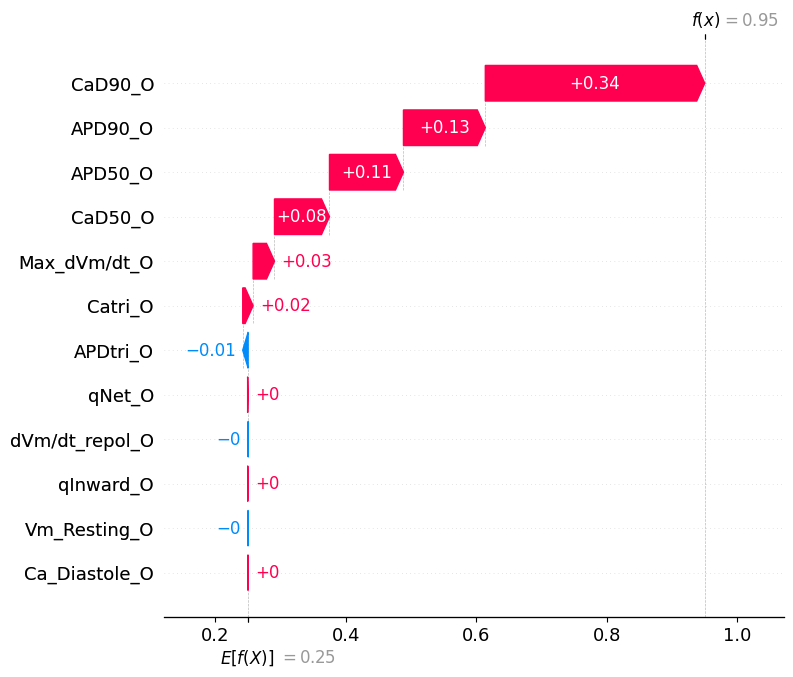

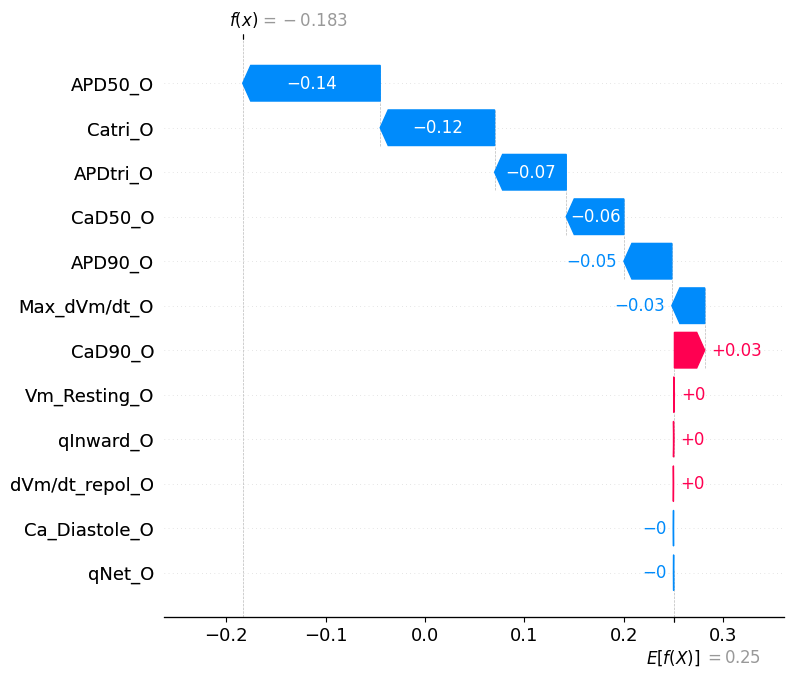

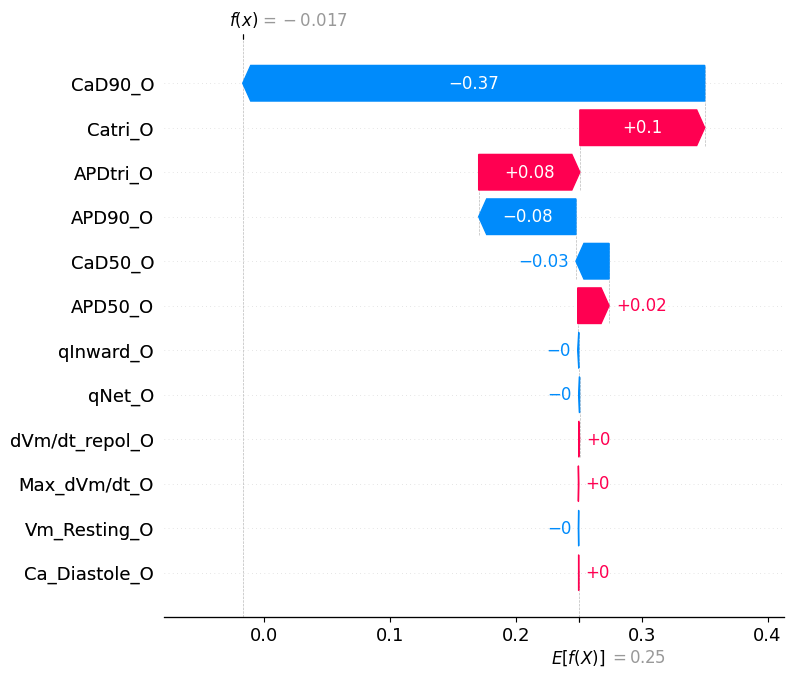

In [28]:
import shap

for i in range(len(shap_values)):
    # Menghitung expected value secara keseluruhan
    overall_expected_value = explainer.expected_value[0]

    # Menggabungkan SHAP values dari beberapa baris data
    merged_shap_values = shap_values[i].mean(axis=0)

    scaled_shap_values = merged_shap_values * 10
    
    plt.figure(figsize=(10, 6)) 

    # Meringkas waterfall plot untuk semua baris data
    shap.plots._waterfall.waterfall_legacy(overall_expected_value, scaled_shap_values, 
                                           feature_names = X_sampled_data.columns, max_display=20, show=False)
#     plt.ylabel("Feature name")
#     plt.xlabel("Mean (SHAP Value)")
    plt.savefig("E:/backup_CML_1/New_Drugs/Li_Endo/Result_Revision_1/12f_knn_metric_euclidean_n_neighbors_3/plot_HIL_Risk_{0}.tiff".format(i), dpi=300, format='tiff')
#     plt.savefig("E:/backup_CML_1/New_Drugs/Li_Endo/Result_Revision_1/12f_svm/plot_HIL_Risk_{0}.jpg".format(i))
    # plt.savefig("my_dependence_plot.pdf") # we can save a PDF of the figure if we want
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Assuming 'shap_values' is a list of arrays, where each array corresponds to a class
# and 'X_data.columns' gives you the feature names.
# Ensure 'output_directory' is defined and exists.

# Daftar warna yang akan digunakan, satu warna untuk setiap kelas
class_colors = ['#077CDB', '#EC2CAC', '#7E8511']

# Iterasi untuk setiap kelas
for class_index in range(len(shap_values)):
    j = str(class_index)
    
    # Assume each class may have a different expected value
    overall_expected_value = explainer.expected_value[class_index]
    
    # If expected_value is a TensorFlow tensor, convert it to a NumPy array.
    # Comment out the following line if explainer.expected_value[class_index] is already a NumPy array.
    # overall_expected_value = overall_expected_value.numpy() if hasattr(overall_expected_value, 'numpy') else overall_expected_value

    # Calculate mean SHAP values for this class
    merged_shap_values = np.mean(shap_values[class_index], axis=0)
    
    # Assuming the SHAP values do not need to be scaled by 1e9
    # Remove the scaling unless it's required for your specific use case
    scaled_shap_values = merged_shap_values

    # Memilih warna berdasarkan indeks kelas
    class_color = class_colors[class_index % len(class_colors)]

    plt.figure(figsize=(10, 6))
    bars = plt.barh(X_data.columns, scaled_shap_values, color=class_color)
    plt.xlabel('SHAP Values')
    plt.ylabel('Feature Names')
    plt.title(f"SHAP Values for Class {j} (Expected Value: {overall_expected_value:.2f})")
    plt.grid(axis='x')

    # Add text labels to the bars
    for bar, shap_value in zip(bars, scaled_shap_values):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{shap_value:.3f}',
                 ha='left', va='center', color='black')

    # Save the plot as a TIFF file with DPI 300
    output_file_path = os.path.join(output_directory, f'SHAP_Plot_Class_{j}.tif')
    plt.savefig(output_file_path, format='tiff', dpi=300)
    plt.close()  # Close the plot to avoid displaying it in the notebook

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dummy data for illustration purposes
# Replace these with your actual DataFrame and SHAP values
X_sampled_data = pd.DataFrame(np.random.rand(10, 12))  # Example feature data with 12 features
shap_values = np.random.rand(12) - 0.5  # Example SHAP values for a single prediction

# Function to plot a waterfall chart
def waterfall_plot(feature_names, shap_values, title=''):
    # Make sure the number of SHAP values matches the number of features
    if len(shap_values) != len(feature_names):
        raise ValueError("Length of SHAP values does not match the number of features")

    # Sort features by their SHAP values
    sorted_indices = np.argsort(shap_values)
    sorted_features = feature_names[sorted_indices]
    sorted_values = shap_values[sorted_indices]

    # Cumulative sum of SHAP values for plotting
    cumulative_values = np.cumsum(sorted_values)
    cumulative_values = np.insert(cumulative_values, 0, 0)

    # Set up colors for positive and negative SHAP values
    colors = ['#1f77b4' if val >= 0 else '#d62728' for val in sorted_values]

    # Create figure
    fig, ax = plt.subplots(figsize=(10, 6))

    # Create patches for the waterfall chart
    for i in range(len(sorted_features)):
        ax.barh(sorted_features[i], sorted_values[i], left=cumulative_values[i],
                color=colors[i], edgecolor='gray')

        # Add value labels
        ax.text(cumulative_values[i + 1], i, f'{sorted_values[i]:.2f}',
                va='center', ha='left' if sorted_values[i] >= 0 else 'right',
                fontsize=8, color='black')

    # Draw line to connect bars
    ax.plot(cumulative_values, range(len(cumulative_values)), 'k-', lw=0.5)

    # Customizations
    ax.axvline(x=0, color='k', linestyle='--', lw=1)  # Reference line at SHAP value 0
    ax.set_title(title)
    ax.set_xlabel('SHAP value')
    ax.set_ylabel('Features')
    ax.grid(True, axis='x', linestyle='--', alpha=0.7)

    plt.show()

    return fig, ax

# Generate waterfall plot using your feature names
waterfall_plot(X_sampled_data.columns, shap_values, title='Waterfall Plot of SHAP Values')


In [ ]:
data_testAs  = pd.read_csv("E:/backup_CML_1/New_Drugs/Li_Endo/Li_Endo_Testing.csv")  # Ganti dengan lokasi dataset A
data_testAs1 = data_testAs.drop(columns=['Sample_ID', 'Drug_Name', 'risk_level', 'risk_code'])
# data_testAs1 = standard_scaler_np(data_testAs1)
data_name = data_testAs['Drug_Name']
data_test_ID = data_testAs['Sample_ID'].astype(int)
data_risk = data_testAs['risk_level']

data_test_n = pd.concat([data_test_ID, data_testAs1, data_name, data_risk], axis=1)


print(data_test_n)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Load model ANN Anda yang sudah dilatih
model =model_test

# Daftar unik dari jenis 'Drug_Name' dalam dataset
unique_drug_names = data_test_n['Drug_Name'].unique()

num_samples = min(len(unique_drug_names), 16)

# Inisialisasi list untuk menyimpan semua confusion matrix
all_confusion_matrices = []
drug_combination = []
d_X_test = []
accu = []
accu_h = []
accu_i = []
accu_l = []
f1_sc = []
f1_sc_h = []
f1_sc_i = []
f1_sc_l = []
lr_p_h = []
lr_p_i = []
lr_p_l = []
lr_n_h = []
lr_n_i = []
lr_n_l = []
auc_high = []
auc_inter = []
auc_low = []
rec_h = []
rec_l = []
spe_h = []
spe_l = []

# Parameters for the normal distribution
mu = 1e-6
sd = 1e-12

# Function to add a normal distribution factor to the likelihood ratios
def add_normal_factor(value):
    # Generate a random number from a normal distribution
    
    # Add the normal factor to the likelihood ratio
    return value + h

# Lakukan iterasi sebanyak 10.000 kali
for _ in range(10000):
    # Pilih secara acak 16 'Drug_Name' yang berbeda
    unique_drug_names = np.random.choice(data_test_n['Drug_Name'].unique(), 16, replace=False)

    # Inisialisasi list untuk menyimpan 16 sampel
    selected_combinations = []

    # Memilih satu sampel dengan 'Drug_Name' yang sesuai untuk setiap 'Drug_Name' yang telah dipilih
    for drug_name in unique_drug_names:
        selected_sample = data_test_n[data_test_n['Drug_Name'] == drug_name].sample(1)
        selected_combinations.append(selected_sample)

    # Menggabungkan 16 sampel menjadi satu DataFrame
    selected_combinations = pd.concat(selected_combinations)

    # Pisahkan fitur dan target sesuai kebutuhan Anda
    X_test = selected_combinations.drop(columns=['Sample_ID', 'Drug_Name', 'risk_level', 'Ca_Peak_O', 'Vm_Peak_O', 'qInward_O', 'Vm_Resting_O', 'Ca_Diastole_O', 'dVm/dt_repol_O', 'qNet_O', 'Max_dVm/dt_O', 'APDtri_O', 'Catri_O', 'CaD50_O'])  # Sesuaikan dengan struktur dataset Anda
    y_test = selected_combinations['risk_level'].values  # Sesuaikan dengan struktur dataset Anda
    y_test = label_encoder.fit_transform(y_test)
    
#     h = norm(loc=mu, scale=sd).rvs()
    
    # Uji model dengan data uji
    y_pred = model.predict(X_test)
    
    y_pred_proba = model.predict_proba(X_test)

    # Hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)  # Sesuaikan dengan nilai threshold yang sesuai
#     print(cm)
    
    tp_high = cm[0,0]
    tn_high = cm[1,1]+cm[1,2]+cm[2,1]+cm[2,2]
    fp_high = cm[1,0]+cm[2,0]
    fn_high = cm[0,1]+cm[0,2]

    tp_inter = cm[1,1]
    tn_inter = cm[0,0]+cm[0,2]+cm[2,0]+cm[2,2]
    fp_inter = cm[0,1]+cm[2,1]
    fn_inter = cm[1,0]+cm[1,2]

    tp_low = cm[2,2]
    tn_low = cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]
    fp_low = cm[0,2]+cm[1,2]
    fn_low = cm[2,0]+cm[2,1]

    acc_high = (tp_high+tn_high)/(tp_high+tn_high+fp_high+fn_high)
    pre_high = tp_high/(tp_high+fp_high)
    rec_high = tp_high/(tp_high+fn_high)
    spe_high = tn_high/(tn_high+fp_high)
    lrp_high = rec_high/(1-spe_high)
    lrn_high = (1-rec_high)/spe_high
    f1s_high = (2*pre_high*rec_high)/(pre_high+rec_high)

    acc_inter = (tp_inter+tn_inter)/(tp_inter+tn_inter+fp_inter+fn_inter)
    pre_inter = tp_inter/(tp_inter+fp_inter)
    rec_inter = tp_inter/(tp_inter+fn_inter)
    spe_inter = tn_inter/(tn_inter+fp_inter)
    lrp_inter = rec_inter/(1-spe_inter)
    lrn_inter = (1-rec_inter)/spe_inter
    f1s_inter = (2*pre_inter*rec_inter)/(pre_inter+rec_inter)

    acc_low = (tp_low+tn_low)/(tp_low+tn_low+fp_low+fn_low)
    pre_low = tp_low/(tp_low+fp_low)
    rec_low = tp_low/(tp_low+fn_low)
    spe_low = tn_low/(tn_low+fp_low)
    lrp_low = rec_low/(1-spe_low)
    lrn_low = (1-rec_low)/spe_low
    f1s_low = (2*pre_low*rec_low)/(pre_low+rec_low)
    
    acc = (acc_high+acc_inter+acc_low)/3
    f1_s = (f1s_high+f1s_inter+f1s_low)/3
    
#     fpr_high, tpr_high, _ = roc_curve(y_test == 0, y_pred[:, 0])
#     roc_auc_high = auc(fpr_high, tpr_high)
    

#     fpr_inter, tpr_inter, _ = roc_curve(y_test == 1, y_pred[:, 1])
#     roc_auc_inter = auc(fpr_inter, tpr_inter)
    

#     fpr_low, tpr_low, _ = roc_curve(y_test == 2, y_pred[:, 2])
#     roc_auc_low = auc(fpr_low, tpr_low)
    
    roc_auc_high = roc_auc_score(y_test == 0, y_pred_proba[:, 0])
    roc_auc_inter = roc_auc_score(y_test == 1, y_pred_proba[:, 1])
    roc_auc_low = roc_auc_score(y_test == 2, y_pred_proba[:, 2])
    
#     if acc >= 0.70:
    auc_high.append(roc_auc_high)
    auc_inter.append(roc_auc_inter)
    auc_low.append(roc_auc_low)

    # Simpan confusion matrix ke dalam list
    drug_combination.append(selected_combinations)
    all_confusion_matrices.append(cm)
    d_X_test.append(X_test)
    accu.append(acc)
    accu_h.append(acc_high)
    accu_i.append(acc_inter)
    accu_l.append(acc_low)
    f1_sc.append(f1_s)
    f1_sc_h.append(f1s_high)
    f1_sc_i.append(f1s_inter)
    f1_sc_l.append(f1s_low)
    lr_p_h.append(lrp_high)
    lr_p_i.append(lrp_inter)
    lr_p_l.append(lrp_low)
    lr_n_h.append(lrn_high)
    lr_n_i.append(lrn_inter)
    lr_n_l.append(lrn_low)
    
# Buat DataFrame dari list
df_result = pd.DataFrame({'Drug_Combination': drug_combination, 
                        'X_data': d_X_test, 
                        'Confusion_Matrix': all_confusion_matrices,
                        'Acc' : accu,
                        'Acc_High': accu_h,
                         'Acc_Inter': accu_i,
                         'Acc_Low': accu_l,
                        'AUC_High': auc_high,
                        'AUC_Inter': auc_inter,
                        'AUC_Low': auc_low,
                         'F1_S': f1_sc,
                         'F1_S_High': f1_sc_h,
                         'F1_S_Inter': f1_sc_i,
                         'F1_S_Low': f1_sc_l,
                         'LR_p_High': lr_p_h,
                         'LR_p_Inter': lr_p_i,
                         'LR_p_Low': lr_p_l,
                         'LR_n_High': lr_n_h,
                         'LR_n_Inter': lr_n_i,
                         'LR_n_Low': lr_n_l})
# df_result_filtered = df_result[df_result['Acc'] >= 0.70]

df_result.to_csv(base_dir + 'Result_of_10000_Times_Test_of_KNN.csv')

In [ ]:
import matplotlib.pyplot as plt
# Define custom colors and edge colors
color_high = '#EC2CAC'  # Custom color for AUC_High
color_inter = '#077CDB'  # Custom color for AUC_Inter
color_low = '#7E8511'  # Custom color for AUC_Low
edge_color = 'black'  # Edge color

# Create a figure for the histograms
plt.figure(figsize=(12, 6))

# Histogram for 'AUC_High'
plt.subplot(131)
plt.hist(auc_high, bins=20, color=color_high, edgecolor=edge_color)
plt.title('AUC_High Histogram')
plt.xlabel('AUC_High')
plt.ylabel('Frequency')

# Histogram for 'AUC_Inter'
plt.subplot(132)
plt.hist(auc_inter, bins=20, color=color_inter, edgecolor=edge_color)
plt.title('AUC_Inter Histogram')
plt.xlabel('AUC_Inter')
plt.ylabel('Frequency')

# Histogram for 'AUC_Low'
plt.subplot(133)
plt.hist(auc_low, bins=20, color=color_low, edgecolor=edge_color)
plt.title('AUC_Low Histogram')
plt.xlabel('AUC_Low')
plt.ylabel('Frequency')

plt.tight_layout()  # Ensure the subplots don't overlap

# Define the file path where you want to save the histograms
output_file_path = base_dir + 'AUC.png'

# Save the figure to the specified file
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')

# Show the plots (optional)
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Assuming df_result is your DataFrame
columns_of_interest = ['Acc', 'Acc_High', 'Acc_Inter', 'Acc_Low', 'AUC_High', 'AUC_Inter', 'AUC_Low', 'F1_S', 'F1_S_High', 'F1_S_Inter', 'F1_S_Low', 'LR_p_High', 'LR_p_Inter', 'LR_p_Low', 'LR_n_High', 'LR_n_Inter', 'LR_n_Low']

# Calculate the median and confidence interval
medians = df_result[columns_of_interest].median()
lower_bound = df_result[columns_of_interest].quantile(0.025)
upper_bound = df_result[columns_of_interest].quantile(0.975)

# Combine median, lower, and upper into a single string with two decimal places
result_strings = medians.round(2).astype(str) + ' (' + lower_bound.round(2).astype(str) + ', ' + upper_bound.round(2).astype(str) + ')'

# Create a new DataFrame with the desired format
table = pd.DataFrame({'Median (Lower_CI, Upper_CI)': result_strings})

# Add a new column for the metric names
table['auc_detail'] = columns_of_interest

# Reorder the columns
table = table[['auc_detail', 'Median (Lower_CI, Upper_CI)']]
# Save the table to Excel
table.to_excel(base_dir + 'Final_result_01.xlsx', index=False)

# Display the table
table
